In [18]:
%load_ext autoreload
%autoreload 2
import physquirrel as sq
import random       
import numpy as np



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Generate a level-1 semi directed network**

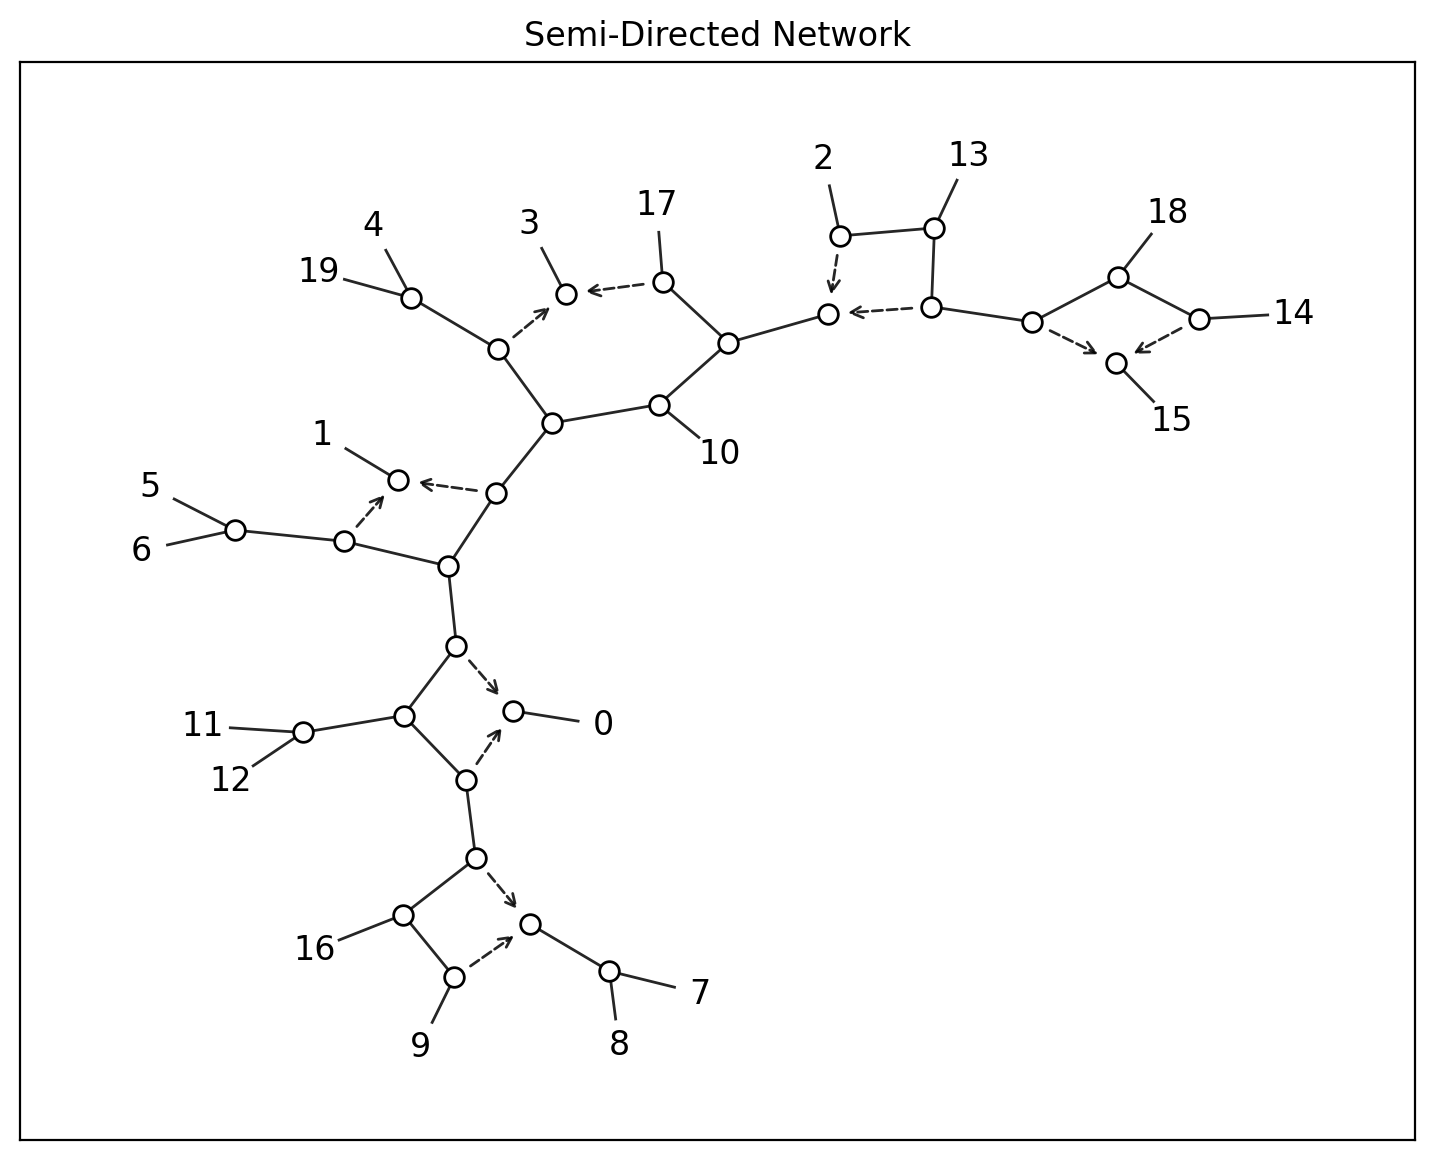

<Axes: title={'center': 'Semi-Directed Network'}>

In [19]:
seed = 348957
random.seed(seed)
np.random.seed(seed)
#7,1
N = sq.sdnetwork.random_semi_directed_network(20, 6)
N.visualize()

**`Q` contains all induced quarnets of `N`**

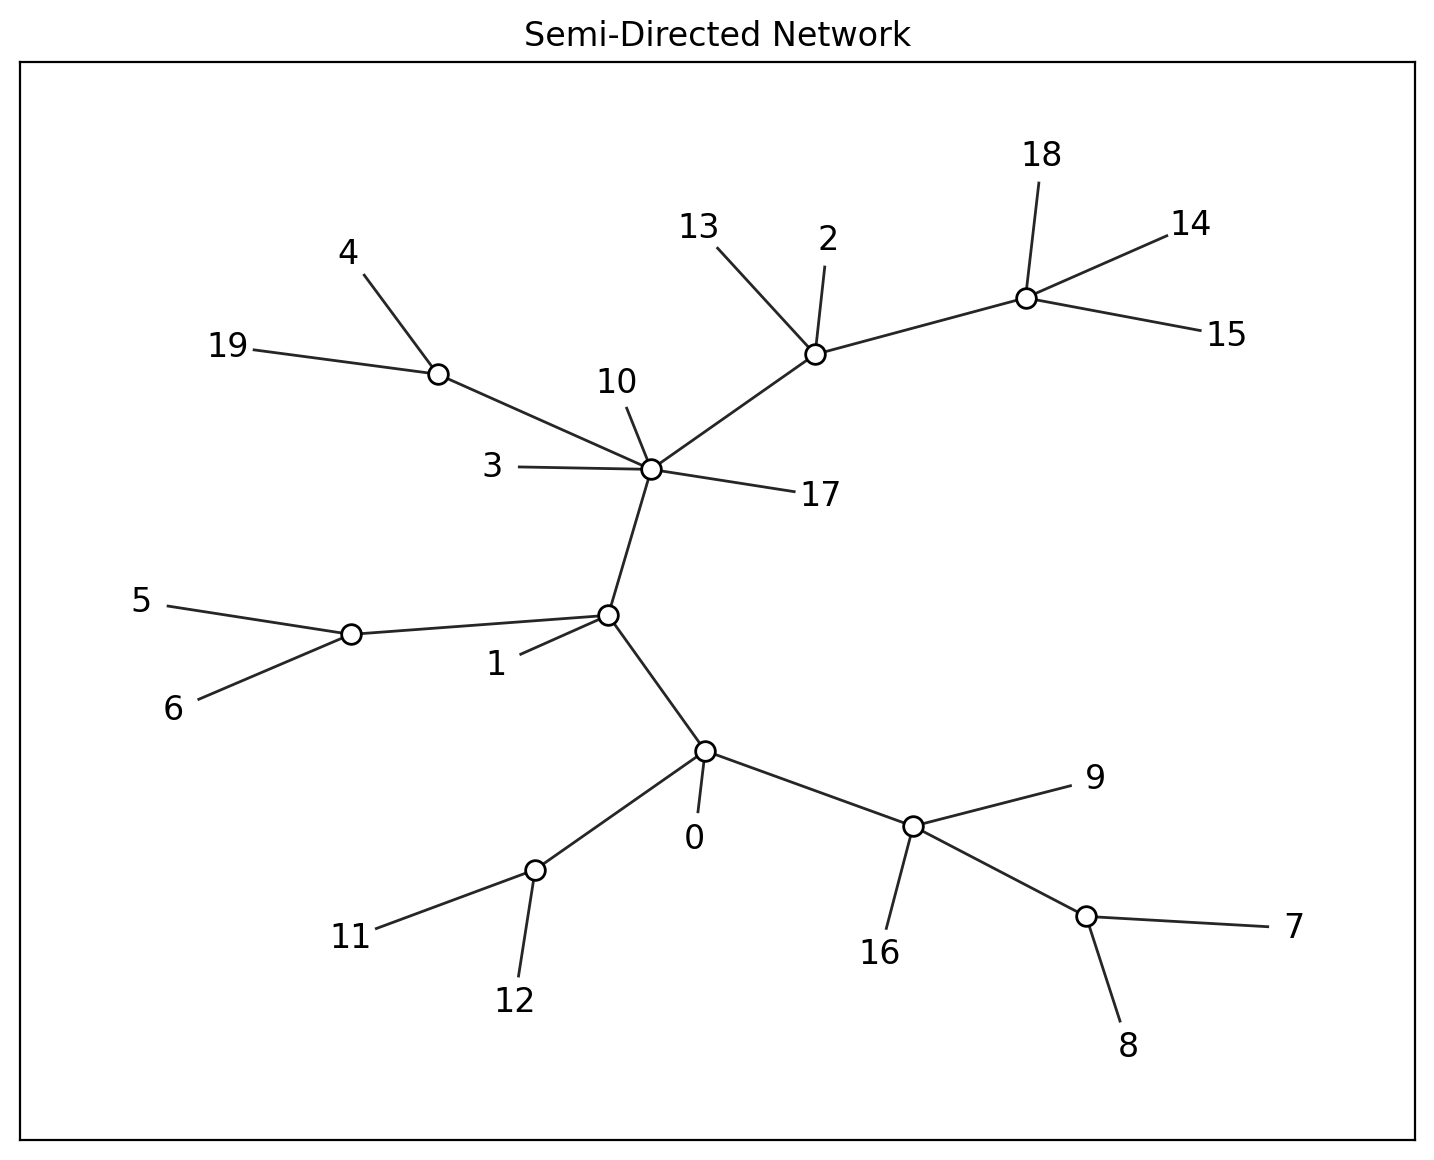

<Axes: title={'center': 'Semi-Directed Network'}>

In [20]:
Q, Q_splits = N.quarnets(triangles=False, return_4splits=True)
N_blob = N.blobtree()
N_blob.visualize()

**Change a portion of the quarnets in `Q` forming `Q_shake`**

In [21]:
Q_shake = Q._shake(epsilon=0.3)
Q_splits = Q_shake.quartetsplits()

sq_trees = Q_shake.squirrel(method = "return_trees", visualize=False)
##OUR METHOD HERE##

candidate_splits = Q_splits.bstar_penalty(threshold=50)
candidate_splits.remove_trivial_splits()
candidate_splits.list_sorted_penalties()
candidate_splits.print_sorted_by_penalty()


Split({'6', '5'}, {'3', '9', '11', '14', '19', '8', '16', '18', '12', '4', '2', '15', '7', '17', '1', '10', '0', '13'}), Penalty: 12.0
Split({'4', '19'}, {'3', '11', '9', '14', '13', '8', '16', '18', '12', '6', '2', '15', '7', '17', '1', '10', '0', '5'}), Penalty: 17.0
Split({'11', '12'}, {'3', '9', '14', '19', '13', '8', '16', '18', '4', '6', '2', '15', '7', '17', '1', '10', '0', '5'}), Penalty: 17.0
Split({'7', '8'}, {'3', '11', '9', '14', '19', '13', '16', '18', '12', '4', '6', '2', '15', '17', '1', '10', '0', '5'}), Penalty: 19.0
Split({'2', '13'}, {'3', '9', '11', '14', '19', '8', '16', '18', '12', '4', '6', '15', '7', '17', '1', '10', '0', '5'}), Penalty: 19.0
Split({'18', '15'}, {'3', '11', '9', '14', '19', '13', '8', '16', '12', '4', '6', '2', '7', '17', '1', '10', '0', '5'}), Penalty: 21.0
Split({'3', '19'}, {'11', '9', '14', '13', '8', '16', '18', '12', '4', '6', '2', '15', '7', '17', '1', '10', '0', '5'}), Penalty: 21.0
Split({'14', '18'}, {'3', '11', '9', '19', '13', '8', '

In [22]:
print(Q)
print(Q.nr_splitquarnets())
print(Q.nr_fourcycles())
len(Q)
print(Q._quarnet_dict)
print(Q.leaves)
q = Q.quarnet({'0','1','2','3'})
print(q)
print(q.weight)
candidate_splits_penalties = Q_shake.bstar_penalty(threshold=1000)
candidate_splits_penalties.remove_trivial_splits()
candidate_splits_penalties.print_sorted_by_penalty()

DenseQuarnetSet[(SQ: 1 10 | 17 15), (SQ: 14 15 | 5 10), (SQ: 12 19 | 13 10), (SQ: 6 13 | 11 7), (SQ: 15 10 | 8 16), (SQ: 15 13 | 17 8), (SQ: 2 10 | 9 8), (SQ: 15 13 | 12 1), (SQ: 17 13 | 0 16), (SQ: 14 2 | 9 8), (SQ: 14 19 | 11 16), (SQ: 9 1 | 14 19), (SQ: 1 6 | 2 10), (4C: *3*-4-11-14), (SQ: 7 5 | 14 10), (SQ: 14 18 | 11 5), (4C: *3*-19-2-17), (SQ: 6 15 | 11 16), (SQ: 14 2 | 4 5), (SQ: 6 13 | 0 16), (SQ: 11 6 | 3 4), (SQ: 8 14 | 6 5), (SQ: 18 13 | 8 10), (SQ: 17 2 | 8 16), (SQ: 11 19 | 17 10), (SQ: 3 5 | 7 16), (SQ: 14 18 | 3 0), (SQ: 18 15 | 0 1), (4C: *3*-0-18-17), (SQ: 4 1 | 11 16), (SQ: 7 5 | 17 13), (SQ: 16 6 | 4 2), (SQ: 12 6 | 8 16), (SQ: 13 10 | 11 7), (4C: *3*-19-0-10), (SQ: 3 2 | 9 7), (SQ: 14 2 | 0 8), (SQ: 1 5 | 7 16), (SQ: 1 8 | 17 10), (SQ: 2 15 | 19 10), (4C: *15*-2-18-14), (SQ: 14 15 | 17 2), (SQ: 4 19 | 0 15), (SQ: 15 5 | 11 7), (SQ: 2 18 | 17 6), (SQ: 4 19 | 8 15), (SQ: 2 13 | 16 5), (SQ: 4 15 | 0 16), (SQ: 0 2 | 8 16), (SQ: 14 13 | 3 1), (SQ: 14 18 | 7 6), (SQ: 9 4 

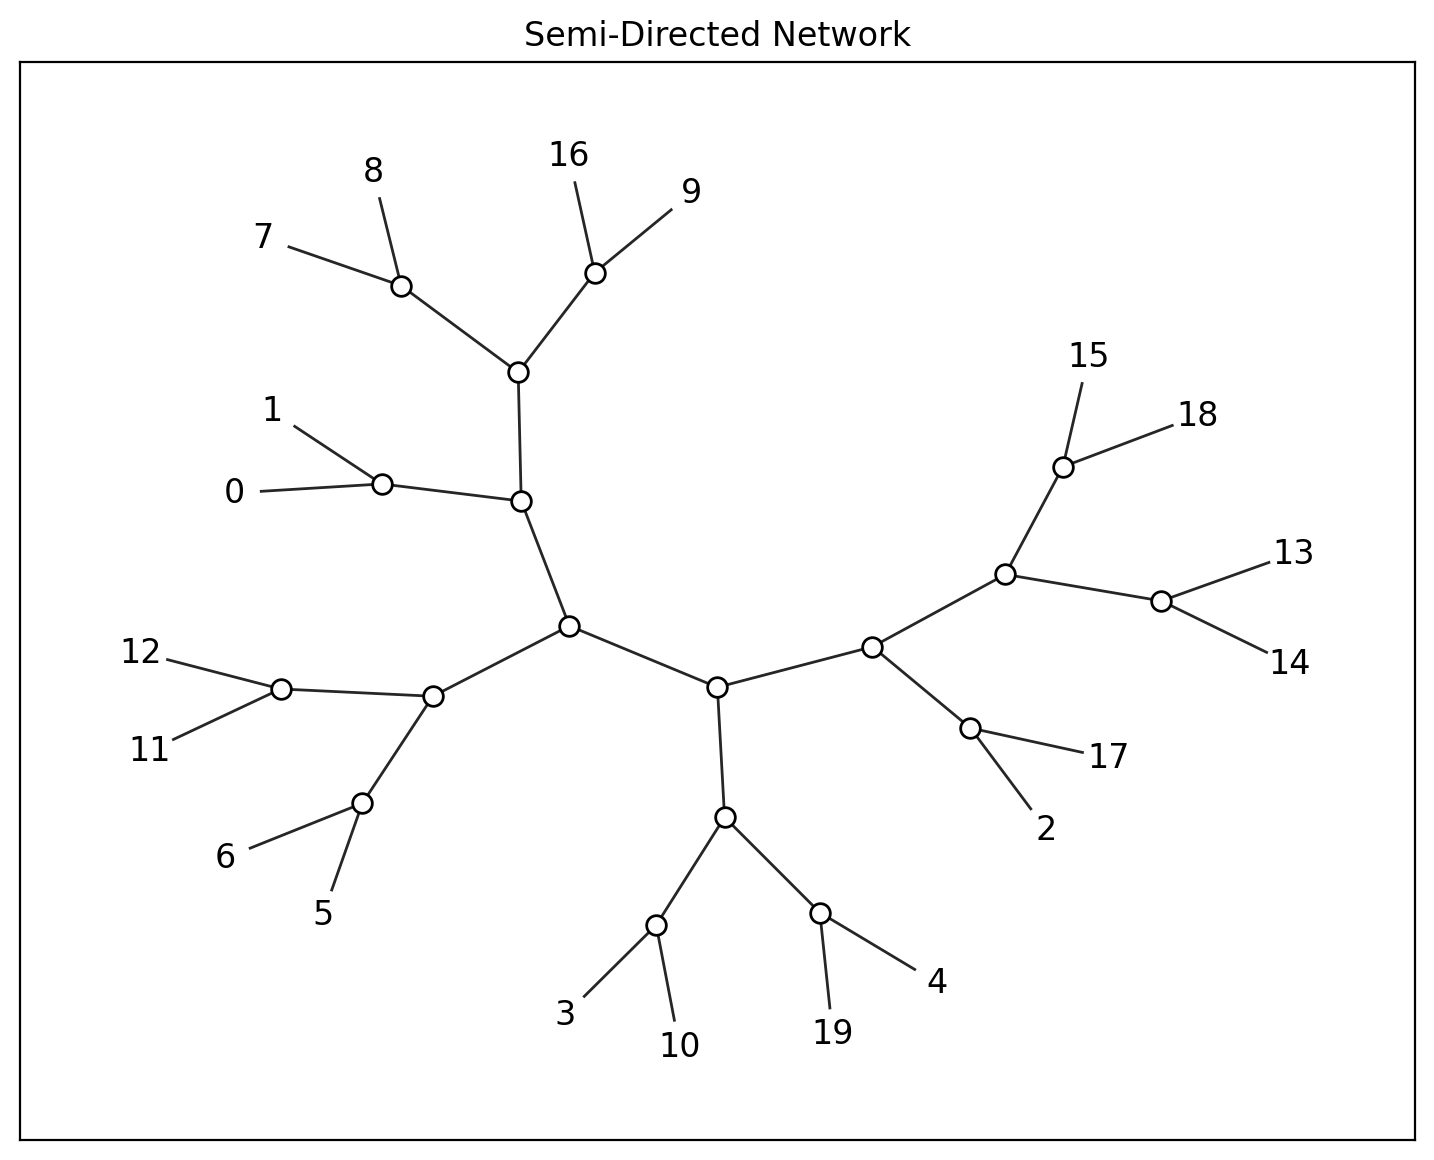

<Axes: title={'center': 'Semi-Directed Network'}>

In [23]:
my_treelist = candidate_splits_penalties.build_trees_bstar_greedy()
my_tree = my_treelist[-1]["tree"]
my_tree.visualize()

In [24]:
sq_scores = []
my_scores = []

for tree in sq_trees:
    sq_score1 = tree.similarity(N_blob)
    sq_score2 = N_blob.similarity(tree)
    sq_scores.append((sq_score1,sq_score2))

for tree_obj in my_treelist:
    tree = tree_obj["tree"]
    my_score1 = tree.similarity(N_blob)
    my_score2 = N_blob.similarity(tree)
    my_scores.append((my_score1,my_score2))


In [25]:
print(my_scores)
print(sq_scores)

[(1.0, 0.038734177215189874), (1.0, 0.07721518987341772), (1.0, 0.11544303797468354), (1.0, 0.15341772151898733), (0.9774834437086093, 0.1868354430379747), (0.929125138427464, 0.21240506329113923), (0.9085714285714286, 0.24151898734177216), (0.8336120401337793, 0.25240506329113926), (0.7800149142431022, 0.2648101265822785), (0.734006734006734, 0.2759493670886076), (0.7956544231764098, 0.38936708860759495), (0.8211416490486257, 0.4916455696202532), (0.7500898957209636, 0.5281012658227848), (0.7010374096196165, 0.5645569620253165), (0.7042853340431195, 0.669873417721519), (0.6835324431951276, 0.7387341772151899), (0.721155830753354, 0.8845569620253164)]
[(0.8152734778121775, 1.0), (0.8229166666666666, 1.0), (0.8342133051742344, 1.0), (0.858135998262003, 1.0), (0.9309450860240396, 1.0), (0.9543367963276154, 1.0), (0.9877469367341836, 1.0), (0.9919638372677047, 1.0), (1.0, 1.0), (1.0, 0.9764556962025317), (1.0, 0.8270886075949367), (1.0, 0.5708860759493671), (1.0, 0.5189873417721519), (1.0

1.0
DenseQuarnetSet[(QT: 6 5 | 3 4), (QT: 6 5 | 4 13), (QT: 6 5 | 7 19), (QT: 6 5 | 14 2), (QT: 6 5 | 17 7), (QT: 6 5 | 7 1), (QT: 6 5 | 12 19), (QT: 6 5 | 15 13), (QT: 6 5 | 12 15), (QT: 6 5 | 7 8), (QT: 6 5 | 0 8), (QT: 6 5 | 7 2), (QT: 6 5 | 9 2), (QT: 6 5 | 8 14), (QT: 6 5 | 0 2), (QT: 6 5 | 9 13), (QT: 6 5 | 11 10), (QT: 6 5 | 17 14), (QT: 6 5 | 9 8), (QT: 6 5 | 11 4), (QT: 6 5 | 9 0), (QT: 6 5 | 0 14), (QT: 6 5 | 14 13), (QT: 6 5 | 3 8), (QT: 6 5 | 18 13), (QT: 6 5 | 17 8), (QT: 6 5 | 11 1), (QT: 6 5 | 3 15), (QT: 6 5 | 11 13), (QT: 6 5 | 12 13), (QT: 6 5 | 19 15), (QT: 6 5 | 17 15), (QT: 6 5 | 1 2), (QT: 6 5 | 19 10), (QT: 6 5 | 18 10), (QT: 6 5 | 0 15), (QT: 6 5 | 0 10), (QT: 6 5 | 8 13), (QT: 6 5 | 14 16), (QT: 6 5 | 4 10), (QT: 6 5 | 3 19), (QT: 6 5 | 17 12), (QT: 6 5 | 3 7), (QT: 6 5 | 1 10), (QT: 6 5 | 1 16), (QT: 6 5 | 4 14), (QT: 6 5 | 3 10), (QT: 6 5 | 2 10), (QT: 6 5 | 11 18), (QT: 6 5 | 16 18), (QT: 6 5 | 8 16), (QT: 6 5 | 9 11), (QT: 6 5 | 17 19), (QT: 6 5 | 11 15), (

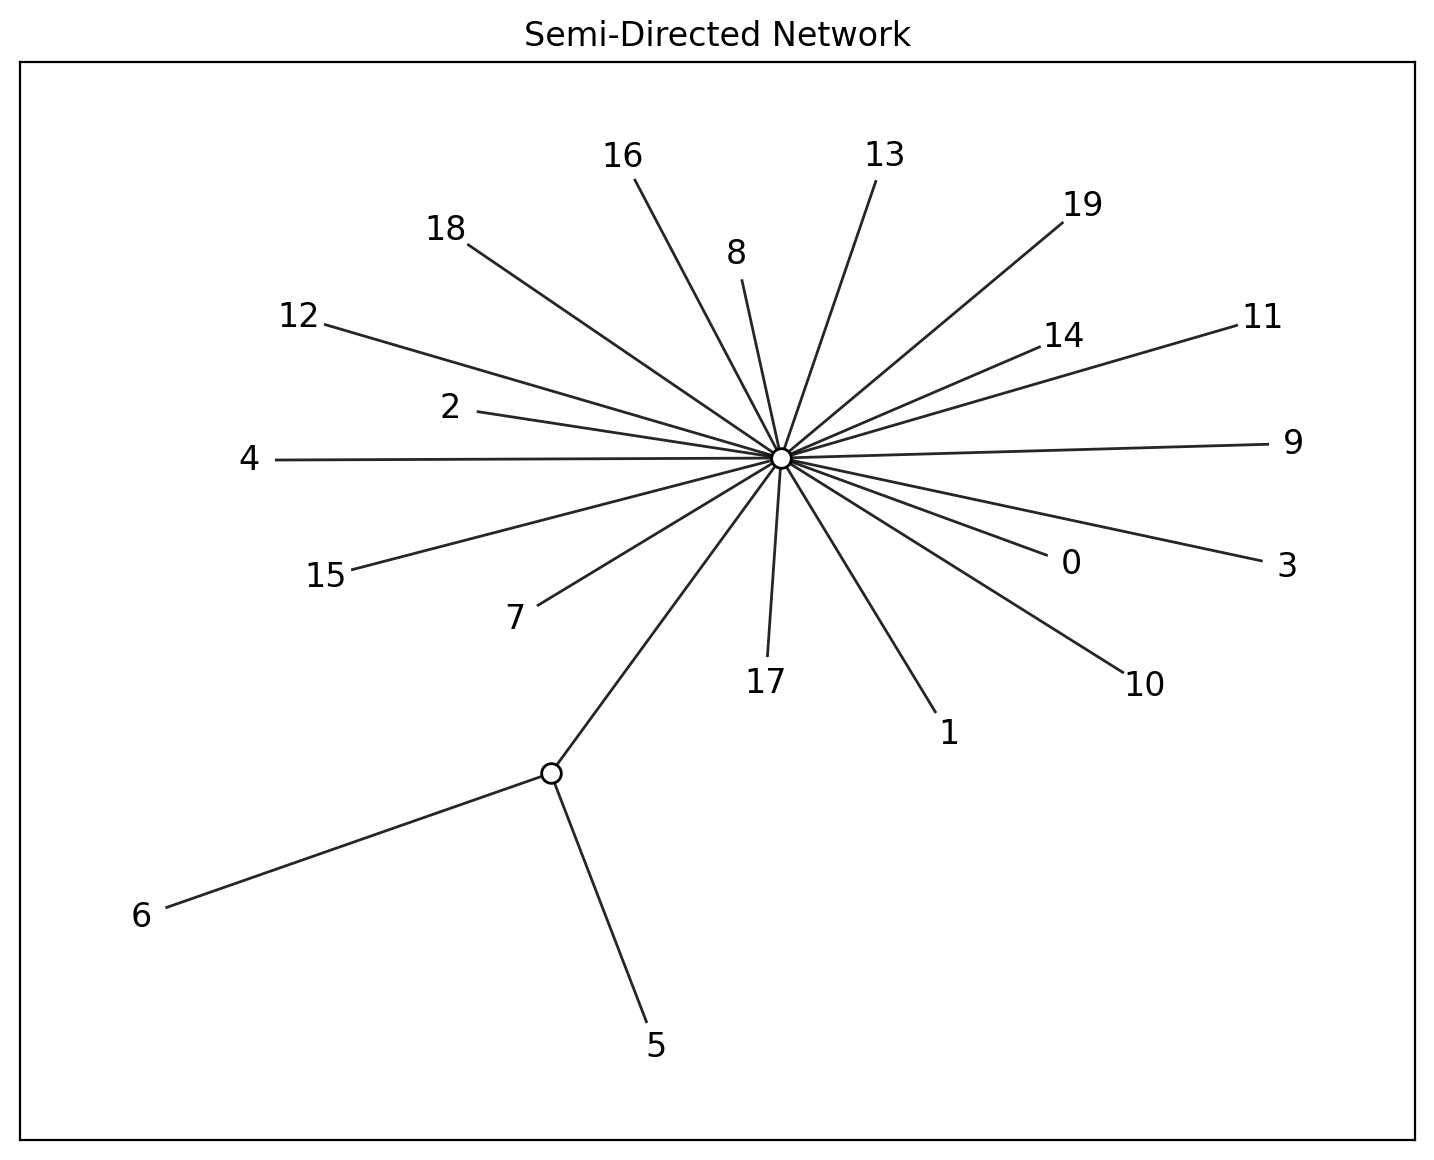

<Axes: title={'center': 'Semi-Directed Network'}>

In [26]:
print(my_treelist[0]["tree"].similarity(N_blob))
print(my_treelist[0]["tree"].quarnets())
my_treelist[0]["tree"].visualize()

DenseQuarnetSet[(QT: 14 15 | 5 10), (QT: 6 13 | 11 7), (QT: 15 10 | 8 16), (QT: 15 13 | 17 8), (QT: 2 10 | 9 8), (QT: 15 13 | 12 1), (QT: 14 19 | 11 16), (QT: 9 1 | 14 19), (QT: 1 6 | 2 10), (QT: 17 13 | 0 16), (QT: 14 2 | 9 8), (QT: 7 5 | 14 10), (QT: 14 18 | 11 5), (QT: 6 15 | 11 16), (QT: 14 2 | 4 5), (QT: 6 13 | 0 16), (QT: 11 6 | 3 4), (QT: 8 14 | 6 5), (QT: 18 13 | 8 10), (QT: 17 2 | 8 16), (QT: 3 5 | 7 16), (QT: 14 18 | 3 0), (QT: 18 15 | 0 1), (QT: 4 1 | 11 16), (QT: 7 5 | 17 13), (QT: 16 6 | 4 2), (QT: 12 6 | 8 16), (QT: 13 10 | 11 7), (QT: 3 2 | 9 7), (QT: 14 2 | 0 8), (QT: 1 5 | 7 16), (QT: 2 13 | 16 5), (QT: 2 15 | 19 10), (QT: 1 8 | 17 10), (QT: 4 19 | 0 15), (QT: 14 15 | 17 2), (QT: 15 5 | 11 7), (QT: 2 18 | 17 6), (QT: 4 19 | 8 15), (QT: 4 15 | 0 16), (QT: 0 2 | 8 16), (QT: 14 13 | 3 1), (QT: 14 18 | 7 6), (QT: 17 10 | 12 0), (QT: 17 5 | 12 8), (QT: 14 2 | 11 19), (QT: 6 5 | 19 10), (QT: 18 13 | 4 5), (QT: 2 19 | 12 8), (QT: 12 1 | 3 18), (QT: 0 1 | 4 18), (QT: 14 13 | 5

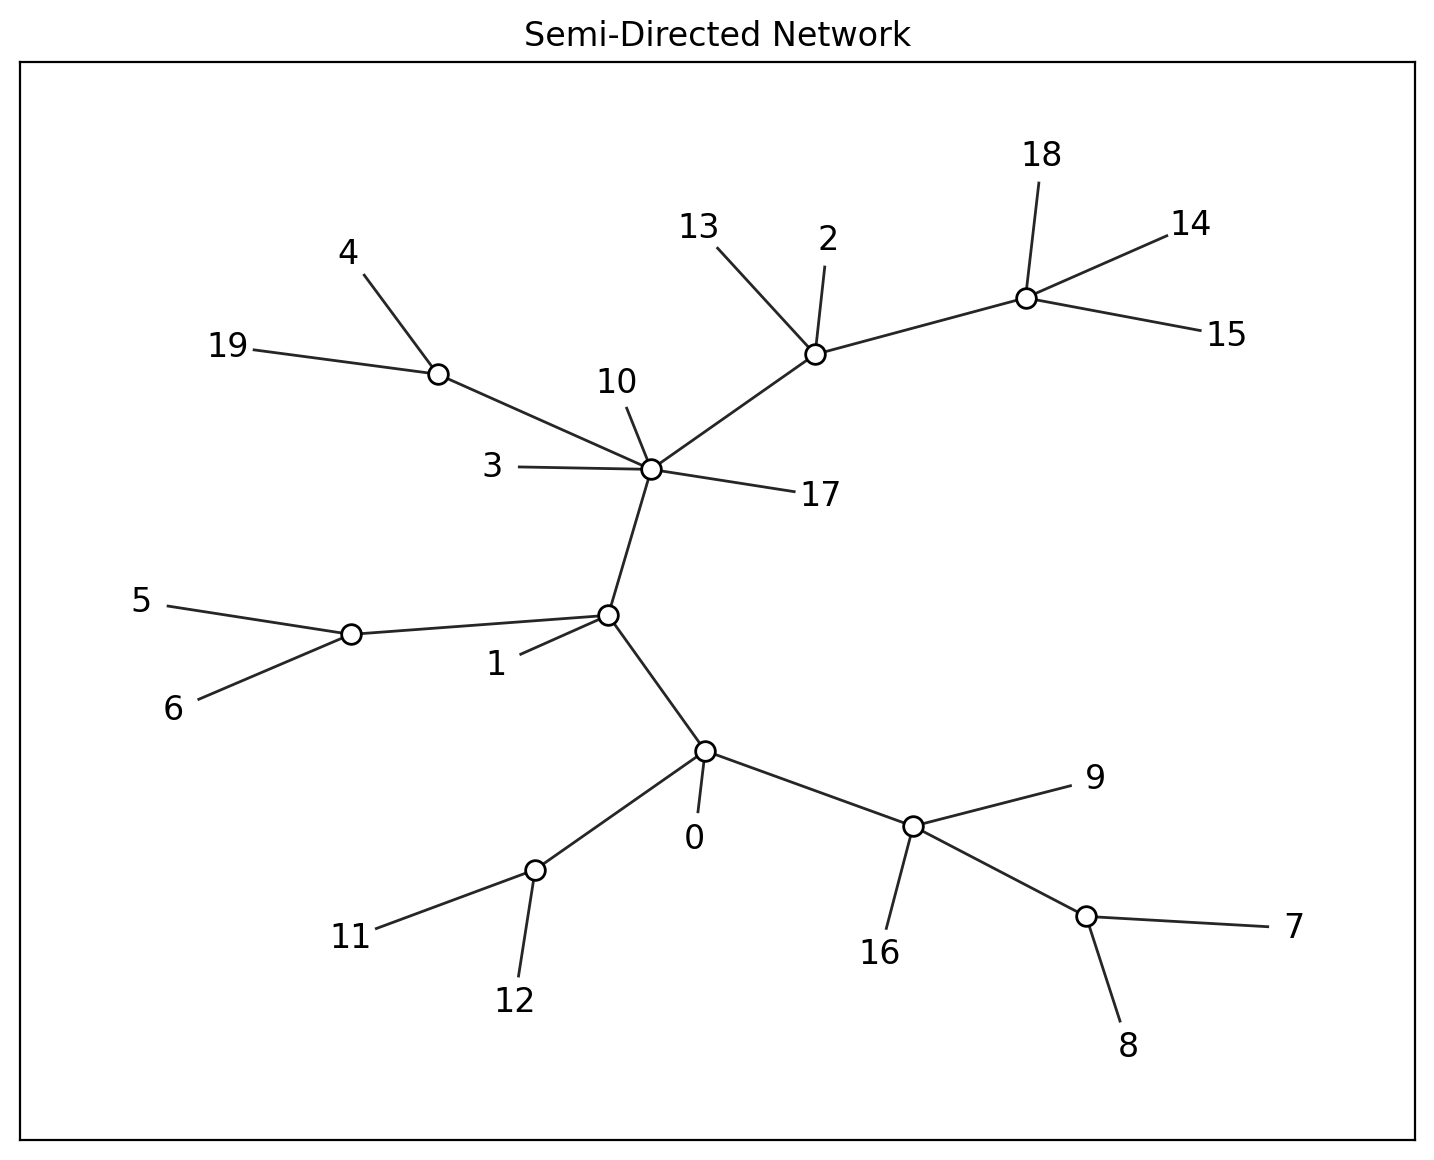

<Axes: title={'center': 'Semi-Directed Network'}>

In [27]:
print(N_blob.quarnets())
N_blob.visualize()